In [1]:
x = {0: [[0, 0], [7, 0], [0, 0]], 1: [[0, 1], [3, 1], [4, 1], [11, 1], [10, 1], [9, 1], [5, 1], [0, 1]], 2: [[0, 2], [2, 2], [8, 2], [1, 2], [0, 2]], 3: [[0, 3], [6, 3], [0, 3]]}

In [2]:
from src.graph import draw_graph

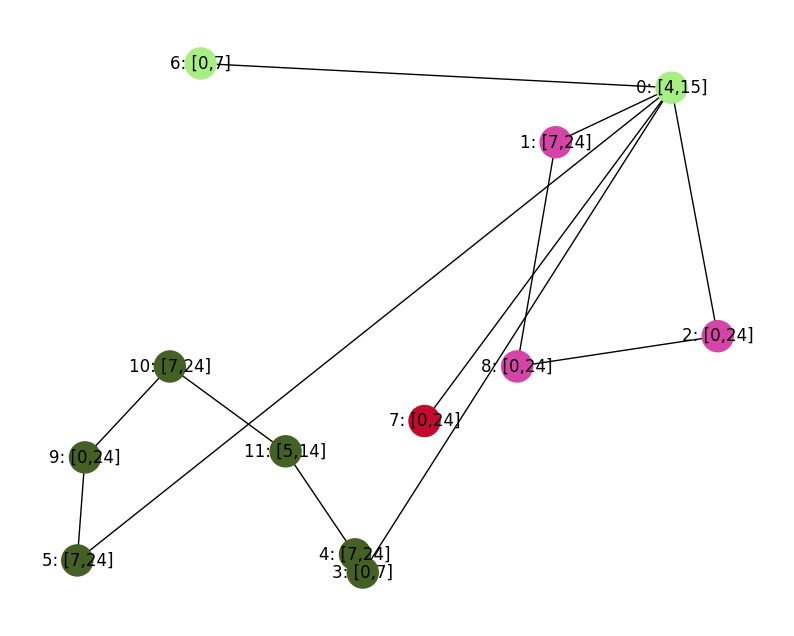

In [3]:
draw_graph(x)

In [1]:
import pandas as pd
import numpy as np

In [2]:
from models.model import Model

In [3]:
x = Model()

A = [7,3,4,11,10,9,5,2,8,1,6,]
B = [2,8,1,7,3,4,11,10,9,5,6]
C = [7,3,4,11,10,9,5,2,8,1,6,]

r, df = x.decoding(A, summary=True)






other
other


In [4]:
df

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,7,63.631753,1.590794,0,24,0.751650,0.751650
1,0,7,3,26.248809,0.656220,0,7,1.061714,0.310064
2,0,3,4,3.162278,0.079057,7,24,1.099069,0.037354
3,0,4,11,19.235384,0.480885,5,14,1.326287,0.227218
4,0,11,10,20.518285,0.512957,7,24,1.568659,0.242372
5,0,10,9,18.601075,0.465027,0,24,1.788384,0.219725
6,0,9,5,17.029386,0.425735,7,24,1.989544,0.201160
7,0,5,0,109.603832,2.740096,4,15,3.284239,1.294695
8,1,5,2,90.873539,2.271838,0,24,1.073444,1.073444
9,1,2,8,26.476405,0.661910,0,24,1.386196,0.312753


In [5]:
r

{0: [[0, 0], [7, 0], [3, 0], [4, 0], [11, 0], [10, 0], [9, 0], [5, 0], [0, 0]],
 1: [[0, 1], [2, 1], [8, 1], [1, 1], [0, 1]],
 2: [[0, 2], [6, 2], [0, 2]]}